In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
     
    return df

In [3]:
# Import Dataset
pubg=pd.read_csv((r'C:\Users\Admin\Desktop\pubg.csv'))
pubg = reduce_mem_usage(pubg)

Memory usage of dataframe is 983.90 MB --> 339.28 MB (Decreased by 65.5%)


In [4]:
pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.800003,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470001,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900002,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875


In [5]:
pubg.shape

(4446966, 29)

In [6]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints   

In [7]:
pubg.duplicated().shape

(4446966,)

In [8]:
pubg.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [9]:
pubg.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [10]:
## Check row with NaN value
pubg[pubg['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [11]:
# Delete
pubg.dropna(inplace=True)

In [12]:
pubg.shape

(4446965, 29)

In [13]:
#Summary Statistics of the  data
pubg.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446965.0,0.233815,0.588573,0.0,0.000000,0.000000,0.0000,22.0
boosts,4446965.0,1.106908,1.715794,0.0,0.000000,0.000000,2.0000,33.0
damageDealt,4446965.0,130.633148,169.886963,0.0,0.000000,84.239998,186.0000,6616.0
DBNOs,4446965.0,0.657876,1.145743,0.0,0.000000,0.000000,1.0000,53.0
headshotKills,4446965.0,0.226820,0.602155,0.0,0.000000,0.000000,0.0000,64.0
heals,4446965.0,1.370148,2.679982,0.0,0.000000,0.000000,2.0000,80.0
killPlace,4446965.0,47.599361,27.462931,1.0,24.000000,47.000000,71.0000,101.0
killPoints,4446965.0,505.006156,627.504921,0.0,0.000000,0.000000,1172.0000,2170.0
kills,4446965.0,0.924784,1.558445,0.0,0.000000,0.000000,1.0000,72.0
killStreaks,4446965.0,0.543955,0.710972,0.0,0.000000,0.000000,1.0000,20.0


## Feature Engineering

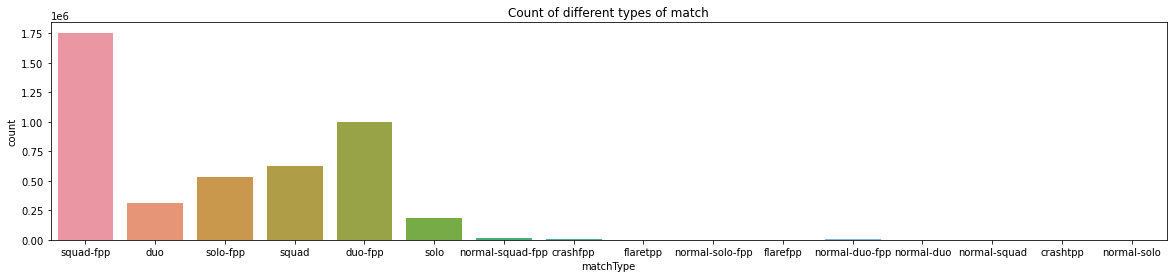

In [14]:
plt.figure(figsize=(20, 4))
sns.countplot('matchType',data=pubg)
plt.title('Count of different types of match')
plt.show()


In [15]:
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) else 'squad' if ('squad' in x) else 'others'

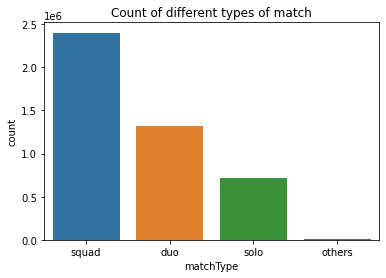

In [16]:
pubg['matchType'] = pubg['matchType'].apply(mapper)
sns.countplot(pubg['matchType'])
plt.title('Count of different types of match')
plt.show()

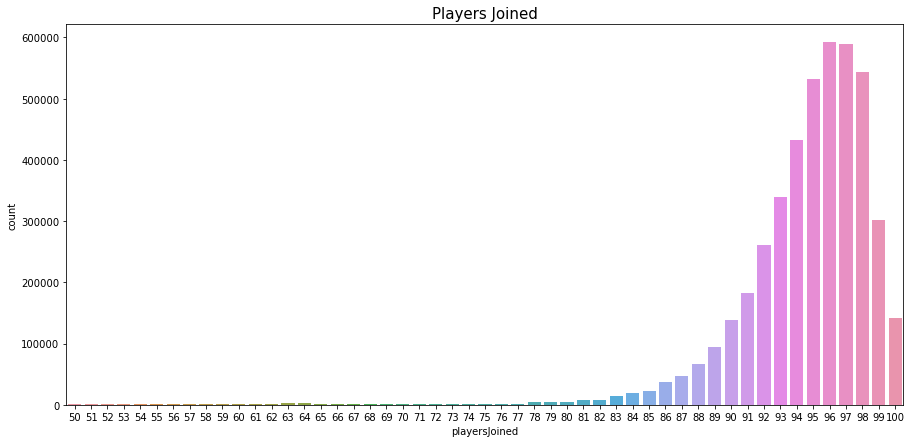

In [17]:
# playersJoined
pubg['playersJoined'] = pubg.groupby('matchId')['matchId'].transform('count')
data = pubg.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,7))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
plt.show()

#### Normalized features

In [18]:
# Create normalized features
pubg['killsNorm'] = pubg['kills']*((100-pubg['playersJoined'])/100 + 1)
pubg['damageDealtNorm'] =pubg['damageDealt']*((100-pubg['playersJoined'])/100 + 1)
pubg['maxPlaceNorm'] = pubg['maxPlace']*((100-pubg['playersJoined'])/100 + 1)
pubg['matchDurationNorm'] = pubg['matchDuration']*((100-pubg['playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
pubg[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000000,0.000000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.470001,99.702301,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000000,69.360000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.900002,35.861002,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000000,103.000000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000000,105.000000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000000,0.000000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.538000,8.879520,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.599998,53.147998,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.270000,38.388100,29,29.87,1930,1987.90


In [19]:
# Create new feature healsandboosts
pubg['healsandboosts'] = pubg['heals'] + pubg['boosts']
pubg[['heals', 'boosts', 'healsandboosts']].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


#### Killing without moving

In [20]:
# Create feature totalDistance
pubg['totalDistance'] = pubg['rideDistance'] + pubg['walkDistance'] + pubg['swimDistance']
# Create feature killsWithoutMoving
pubg['killsWithoutMoving'] = ((pubg['kills'] > 0) & (pubg['totalDistance'] == 0))

In [21]:
# Create headshot_rate feature
pubg['headshot_rate'] = pubg['headshotKills'] / pubg['kills']
pubg['headshot_rate'] = pubg['headshot_rate'].fillna(0)


# Outlier Detection

In [22]:
# Check players who kills without moving
display(pubg[pubg['killsWithoutMoving'] == True].shape)
pubg[pubg['killsWithoutMoving'] == True].head(10)

(1535, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.000000,0,0,3,18,...,0.8571,58,8.52,842.060000,21.30,842.06,3,0.0,True,0.000000
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.600006,0,0,6,33,...,0.6000,42,4.74,547.628010,17.38,2834.52,6,0.0,True,0.000000
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.000000,0,4,5,3,...,0.8947,21,35.80,3132.500000,35.80,1607.42,5,0.0,True,0.200000
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.800003,0,0,0,69,...,0.0000,73,1.27,200.406004,24.13,1014.73,0,0.0,True,0.000000
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.000000,0,1,0,37,...,0.3000,42,1.58,158.000000,17.38,2834.52,0,0.0,True,1.000000
20881,40871bf43ddac7,2cea046b7d1dce,0600f86f11c6e4,0,0,506.100006,4,1,3,7,...,0.8000,44,9.36,789.516010,9.36,909.48,3,0.0,True,0.166667
23298,b950836d0427da,1f735b1e00d549,ad860f4e162bbc,1,0,1124.000000,0,4,1,7,...,0.6000,48,18.24,1708.480000,9.12,836.00,1,0.0,True,0.333333
24640,aeced11d46de19,d4009ffa95bb4f,73f3ed869c9171,2,0,529.900024,0,2,11,12,...,0.8571,57,10.01,757.757035,21.45,856.57,11,0.0,True,0.285714
25659,6626c4d47cffa0,ee3fe5c0d917c3,341341834b7941,0,1,128.899994,0,1,6,53,...,0.2857,61,2.78,179.170992,11.12,1017.48,7,0.0,True,0.500000
30079,869331b90bfa3f,869ea3ad036e53,fa373e28ff5062,0,0,85.559998,0,0,0,46,...,0.8571,53,1.47,125.773196,22.05,1051.05,0,0.0,True,0.000000


In [23]:
# Remove outliers
pubg.drop(pubg[pubg['killsWithoutMoving'] == True].index, inplace=True)

### Anomalies in roadKills

In [24]:
# Players who got more than 10 roadKills
pubg[pubg['roadKills'] > 10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
2733926,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,...,0.4286,92,15.12,1345.68,99.36,1572.48,0,1282.302002,False,0.000000
2767999,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,...,0.4713,88,12.32,1234.24,98.56,2179.52,0,4934.600098,False,0.000000
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,...,1.0000,38,32.40,3359.88,61.56,3191.40,19,5876.000000,False,0.050000
3524413,9d9d044f81de72,8be97e1ba792e3,859e2c2db5b125,0,3,1866.0,0,5,7,1,...,0.9398,84,20.88,2164.56,97.44,2233.00,10,7853.000000,False,0.277778


In [25]:
# Drop roadKill 'cheaters'
pubg.drop(pubg[pubg['roadKills'] > 10].index, inplace=True)

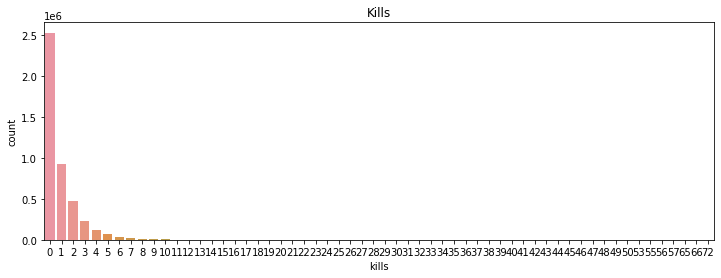

In [26]:
# Plot the distribution of kills
plt.figure(figsize=(12,4))
sns.countplot(data=pubg, x=pubg['kills']).set_title('Kills')
plt.show()


In [27]:
# Players who got more than 30 kills
display(pubg[pubg['kills'] > 30].shape)
pubg[pubg['kills'] > 30].head(10)

(95, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3725.0,0,7,0,2,...,0.8571,16,64.40,6854.00,14.72,3308.32,0,48.820000,False,0.200000
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3087.0,0,8,27,3,...,1.0000,16,57.04,5680.08,14.72,3308.32,27,780.700012,False,0.258065
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5479.0,0,12,7,4,...,0.7000,11,90.72,10355.31,20.79,3398.22,7,23.709999,False,0.250000
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4033.0,0,40,0,1,...,1.0000,62,57.96,5565.54,11.04,1164.72,0,718.299988,False,0.952381
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3171.0,0,6,15,1,...,1.0000,11,66.15,5993.19,17.01,3394.44,15,71.510002,False,0.171429
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,1.0000,11,122.85,12504.24,20.79,3398.22,5,1036.000000,False,0.200000
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,...,1.0000,13,72.93,7169.58,24.31,3356.65,5,124.199997,False,0.230769
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2907.0,0,27,2,1,...,1.0000,38,53.46,4709.34,8.10,1339.74,2,382.399994,False,0.818182
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3055.0,0,9,0,1,...,1.0000,20,59.40,5499.00,32.40,1605.60,0,35.299999,False,0.272727
662650,dd424a8b74bd49,ac9dea6d62f2e6,8a728def0644be,9,0,3454.0,38,9,4,1,...,0.2308,54,49.64,5042.84,20.44,1749.08,4,111.099998,False,0.264706


In [28]:
# Remove outliers
pubg.drop(pubg[pubg['kills'] > 30].index, inplace=True)
  
    

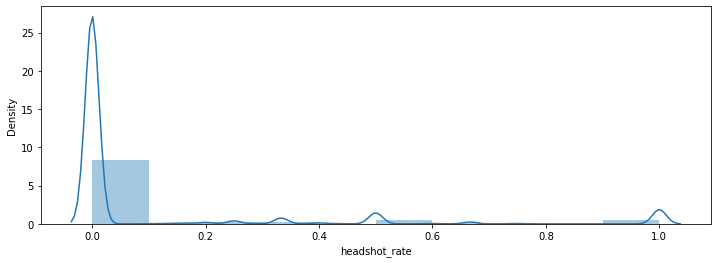

In [29]:
# Plot the distribution of headshot_rate
plt.figure(figsize=(12,4))
sns.distplot(pubg['headshot_rate'], bins=10)
plt.show()


In [30]:
#Players who made a minimum of 10 kills and have a headshot_rate of 100%
display(pubg[(pubg['headshot_rate'] == 1) & (pubg['kills'] > 9)].shape)
pubg[(pubg['headshot_rate'] == 1) & (pubg['kills'] > 9)].head(10)

(24, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
281570,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0.8462,93,10.70,1296.84,28.89,1522.61,3,2939.000000,False,1.0
346124,044d18fc42fc75,fc1dbc2df6a887,628107d4c41084,3,5,1620.0,13,11,3,1,...,1.0000,96,11.44,1684.80,28.08,1796.08,8,8142.000000,False,1.0
871244,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1.0000,98,13.26,1392.30,27.54,1280.10,4,2105.000000,False,1.0
908815,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,0.9630,95,10.50,1611.75,29.40,1929.90,8,7948.000000,False,1.0
963463,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1.0000,96,10.40,1409.20,28.08,1473.68,8,3476.000000,False,1.0
1079403,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,1.0000,95,11.55,1278.90,29.40,1912.05,8,8178.000000,False,1.0
1167959,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,1.0000,97,10.30,1096.95,27.81,1283.38,5,2858.899902,False,1.0
1348164,474a641f0a4bcb,2fdad3ca6fb3c0,114499c82f35d7,1,5,1319.0,11,12,1,1,...,1.0000,93,12.84,1411.33,29.96,1851.10,6,5963.000000,False,1.0
1380385,202ce6a55119c5,2df66861f597b4,496700c29a5d44,1,4,1150.0,4,11,1,1,...,1.0000,88,12.32,1288.00,51.52,1397.76,5,3108.000000,False,1.0
1483199,9d483f7cbb34d4,db5867bc814191,69495e3c478eb9,0,10,1478.0,8,13,2,1,...,1.0000,96,13.52,1537.12,50.96,1434.16,12,2479.800049,False,1.0


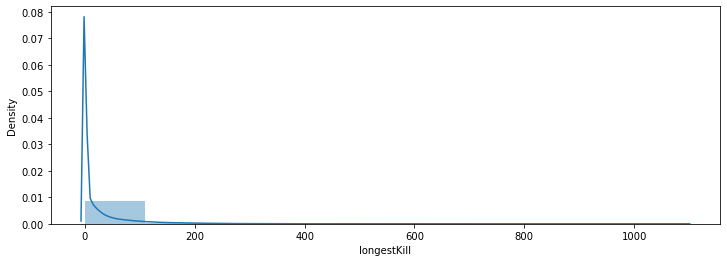

In [31]:
# Plot the distribution of longestKill
plt.figure(figsize=(12,4))
sns.distplot(pubg['longestKill'], bins=10)
plt.show()

In [32]:
# Check out players who made kills with a distance of more than 1 km
display(pubg[pubg['longestKill'] >= 1000].shape)
pubg[pubg['longestKill'] >= 1000].head(10)

(20, 38)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
202281,88e2af7d78af5a,34ddeede52c042,4346bc63bc67fa,0,3,783.900024,5,1,1,5,...,0.9231,88,4.48,877.968027,30.24,2087.68,4,3775.199951,False,0.250000
240005,41c2f5c0699807,9faecf87ab4275,634edab75860b3,5,0,1284.000000,8,5,7,18,...,0.5385,29,18.81,2195.640000,23.94,2236.68,7,48.869999,False,0.454545
324313,ef390c152bcc3d,30fd444be3bbc1,4f7f8d6cf558b4,2,0,1028.000000,0,0,0,9,...,1.0000,51,14.90,1531.720000,19.37,1040.02,0,2981.000000,False,0.000000
656553,9948b058562163,c8cb8491112bf6,0104eeb664494d,6,0,1410.000000,17,5,0,3,...,0.6000,41,25.44,2241.900000,9.54,1734.69,0,29.209999,False,0.312500
803632,4e7e6c74e3c57d,94698690918933,da91b0c3d875f8,0,0,196.800003,0,0,0,51,...,0.0000,61,1.39,273.552004,11.12,654.69,0,3159.000000,False,0.000000
895411,1f5ba6e0cfb968,512ea24b831be3,5fb0d8b1fc16cf,4,0,1012.000000,11,5,0,5,...,0.9091,86,11.40,1153.680000,13.68,1163.94,0,569.500000,False,0.500000
1172437,303a93cfa1f46c,8795d39fd0df86,9c8962b58bb3e3,2,1,329.299988,0,0,2,45,...,0.2857,58,4.26,467.605983,11.36,825.02,3,832.500000,False,0.000000
1209416,528659ff1c1aec,7d1ba83423551d,ea9386587d5888,0,6,1640.000000,0,7,0,1,...,0.9412,52,22.20,2427.200000,76.96,1827.80,6,2848.000000,False,0.466667
1642712,91966848e08e2f,0ee4fbd27657c9,17dea22cefe62a,3,2,2103.000000,0,4,11,11,...,0.5000,28,39.56,3617.160000,25.80,3092.56,13,235.300003,False,0.173913
2015559,5ff0c1a9fab2ba,2d8119b1544f87,904cecf36217df,3,3,1302.000000,0,6,5,15,...,0.6000,42,17.38,2057.160000,17.38,2834.52,8,133.199997,False,0.545455


In [33]:
# Remove outliers
pubg.drop(pubg[pubg['longestKill'] >= 1000].index, inplace=True)


### Anomalies in travelling (rideDistance, walkDistance and swimDistance)

In [34]:
# Summary statistics for the Distance features
pubg[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance']].describe()

,walkDistance,rideDistance,swimDistance,totalDistance
count,4.445311e+06,4.445311e+06,4.445311e+06,4.445311e+06
mean,1.148926e+03,6.063038e+02,4.510894e+00,1.755305e+03
std,1.180588e+03,1.496642e+03,3.024322e+01,2.175305e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.554000e+02,0.000000e+00,0.000000e+00,1.584000e+02
50%,6.864000e+02,0.000000e+00,0.000000e+00,7.893000e+02
75%,1.977000e+03,2.606500e-01,0.000000e+00,2.729000e+03
max,2.578000e+04,4.071000e+04,3.823000e+03,4.127010e+04


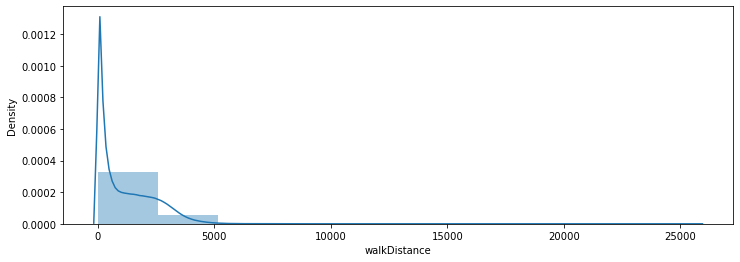

In [35]:
# Plot the distribution of walkDistance
plt.figure(figsize=(12,4))
sns.distplot(pubg['walkDistance'], bins=10)
plt.show()

In [36]:
# It is not possible for players to play to roam around and explore places without killing anyone 
# and how can they travel 10kms in the game?
pubg[(pubg['walkDistance'] >= 10000) & (pubg['kills'] == 0)].shape
pubg[(pubg['walkDistance'] >= 10000) & (pubg['kills'] == 0)].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
23026,8a6562381dd83f,23e638cd6eaf77,b0a804a610e9b0,0,1,0.000000,0,0,0,44,...,0.8163,99,0.0,0.000000,99.99,1925.06,1,13540.302734,False,0.0
34344,5a591ecc957393,6717370b51c247,a15d93e7165b05,0,3,23.219999,0,0,1,34,...,0.9474,65,0.0,31.346999,27.00,2668.95,4,10070.907227,False,0.0
68590,8c0d9dd0b4463c,c963553dc937e9,926681ea721a47,0,1,32.340000,0,0,1,46,...,0.8333,96,0.0,33.633600,50.96,1909.44,2,12483.620117,False,0.0
94400,d441bebd01db61,7e179b3366adb8,923b57b8b834cc,1,1,73.080002,0,0,3,27,...,0.8194,73,0.0,92.811602,92.71,2293.62,4,11490.629883,False,0.0
125103,db5a0cdc969dcb,50cc466757950e,c306a9745c4c1d,0,4,37.730000,0,0,7,47,...,0.7340,95,0.0,39.616500,99.75,2054.85,11,12828.797852,False,0.0


In [37]:
# Remove outliers
pubg.drop(pubg[(pubg['walkDistance'] >= 10000) & (pubg['kills'] == 0)].index, inplace=True)

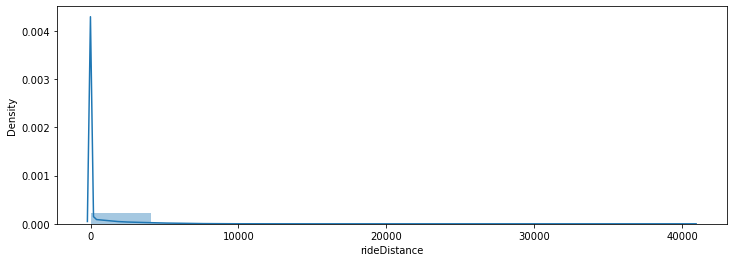

In [38]:
# Plot the distribution of rideDistance
plt.figure(figsize=(12,4))
sns.distplot(pubg['rideDistance'], bins=10)
plt.show()


In [39]:
# It is not possible for players to play to roam around and explore places without killing anyone 
# and how can you ride for 20km?
pubg[(pubg['rideDistance'] >= 20000) & (pubg['kills'] == 0)].shape
pubg[(pubg['rideDistance'] >= 20000) & (pubg['kills'] == 0)].head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
63015,adb7dae4d0c10a,8ede98a241f30a,8b36eac66378e4,0,0,0.000000,0,0,0,55,...,0.5376,94,0.0,0.000000,99.64,2004.46,0,22065.400391,False,0.0
72763,198e5894e68ff4,ccf47c82abb11f,d92bf8e696b61d,0,0,0.000000,0,0,0,46,...,0.7917,97,0.0,0.000000,99.91,1861.21,0,21197.199219,False,0.0
140097,9944fbbea2b91e,18b4d5f4bb1906,d9d4a3e50cae75,1,0,12.550000,0,0,0,53,...,0.5000,89,0.0,13.930500,98.79,2107.89,0,21293.230469,False,0.0
297186,88904c200175b6,012a61a01e146e,7a270c25e9b70c,0,1,0.000000,0,0,1,47,...,0.7447,96,0.0,0.000000,49.92,1995.76,2,29267.300781,False,0.0
371098,f7071357f6b762,f3ee20821f4627,ac47c86bf385bf,0,0,72.919998,1,0,0,45,...,0.6875,96,0.0,75.836798,50.96,1953.12,0,21942.099609,False,0.0


In [40]:
pubg.drop(pubg[(pubg['rideDistance'] >= 20000) & (pubg['kills'] == 0)].index, inplace = True)

In [41]:
# How is it even possible that a player is able to ride and kill without walking even a single meter ?
pubg[(pubg['walkDistance'] == 0) & (pubg['rideDistance'] > 0) & (pubg['kills'] > 0)].shape
pubg[(pubg['walkDistance'] == 0) & (pubg['rideDistance'] > 0) & (pubg['kills'] > 0)].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
219621,49e86bcbb74918,5bf4ac7f5f89a0,05a97d10e3cf81,0,0,100.000000,1,0,0,38,...,0.0000,95,1.05,105.000000,27.30,2077.95,0,673.099976,False,0.0
1051447,c43116d1c3d4e5,bd09c97b67800a,aad60eee7eeb79,0,0,102.199997,0,0,0,34,...,0.1250,89,1.11,113.441997,98.79,2147.85,0,1757.000000,False,0.0
1053213,4a8011f19b0e0e,037c89b0cef255,238171821a1d0e,1,0,100.000000,1,0,0,38,...,0.0638,96,1.04,104.000000,49.92,1956.24,0,36.240002,False,0.0
1166930,553f199b5538c5,560c2ba9dcbbd0,afb05e37d884fc,2,0,168.500000,1,0,0,45,...,0.0667,97,1.03,173.555000,31.93,1852.97,0,391.799988,False,0.0
1479750,bcdf0f6c5d08bf,ea2ed2cc5955dd,2b59ed013eaf15,0,0,100.000000,1,0,0,46,...,0.0612,97,1.03,103.000000,51.50,1938.46,0,468.299988,False,0.0


In [42]:
pubg.drop(pubg[(pubg['walkDistance'] == 0) & (pubg['rideDistance'] > 0) & (pubg['kills'] > 0)].index, inplace = True)

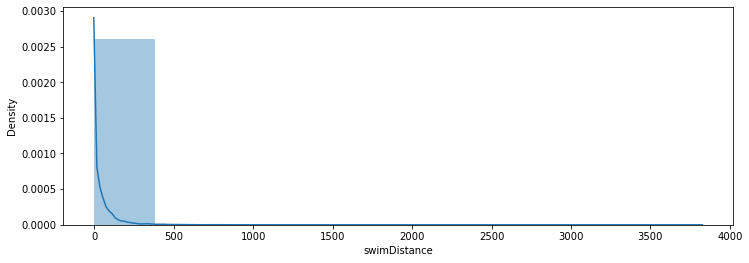

In [43]:
# Plot the distribution of swimDistance
plt.figure(figsize=(12,4))
sns.distplot(pubg['swimDistance'], bins=10)
plt.show()

In [44]:
# Players who swam more than 2 km
pubg[pubg['swimDistance'] >= 2000].shape
pubg[pubg['swimDistance'] >= 2000].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
177973,c2e9e5631f4e54,23213058f83abe,f01eb1073ef377,0,5,78.120003,1,0,1,47,...,0.9592,98,0.00,79.682403,51.00,1426.98,6,3297.000000,False,0.0
274258,ba5e3dfb5a0fa0,383db055216ec2,d6e13468e28ab4,0,4,53.320000,0,0,16,39,...,0.9600,94,0.00,56.519200,27.56,2319.28,20,10113.000000,False,0.0
1005337,d50c9d0e65fe2a,4996575c11abcb,668402592429f8,0,1,503.000000,4,3,1,6,...,1.0000,88,3.36,563.360000,29.12,2124.64,2,10740.000000,False,1.0
1195818,f811de9de80b70,d08ddf7beb6252,8a48703ab52ec8,0,7,352.299988,3,1,6,4,...,1.0000,98,5.10,359.345988,49.98,1423.92,13,3083.100098,False,0.2
1227362,a33e917875c80e,5b72674b42712b,5fb0d8b1fc16cf,0,1,589.200012,3,1,1,46,...,1.0000,86,2.28,671.688014,13.68,1163.94,2,4818.299805,False,0.5


In [45]:
# Remove outliers
pubg.drop(pubg[pubg['swimDistance'] >= 2000].index, inplace=True)

In [46]:
# What was the player doing in the game when total distance travelled by him/her is 0? 
pubg[(pubg['totalDistance'] == 0)].shape
pubg[(pubg['totalDistance'] == 0)].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
29,ac5b57ff39979c,857cc55b2b6001,e019e04dee4f19,0,0,0.0,0,0,0,87,...,0.0000,92,0.0,0.0,49.68,1652.40,0,0.0,False,0.0
116,6adb021f5165ff,58e5500bd40898,de5c692fe25a73,0,0,0.0,0,0,0,68,...,0.0000,74,0.0,0.0,51.66,1781.64,0,0.0,False,0.0
151,a2bbe20aa8789d,926e8a09bab249,e36e4203ed4831,0,0,0.0,0,0,0,92,...,0.0000,95,0.0,0.0,50.40,1445.85,0,0.0,False,0.0
237,baaa694658e085,d034728f22cff7,fa71620624d3e7,0,0,0.0,0,0,0,94,...,0.0000,97,0.0,0.0,29.87,1398.74,0,0.0,False,0.0
283,3ab8128e6bcbe6,bb52a209f2e938,aabd2650b129e2,0,0,0.0,0,0,0,84,...,0.1277,95,0.0,0.0,50.40,1886.85,0,0.0,False,0.0


In [47]:
pubg.drop(pubg[(pubg['totalDistance'] == 0)].index, inplace=True)


### Anomalies in supplies (weaponsAcquired)

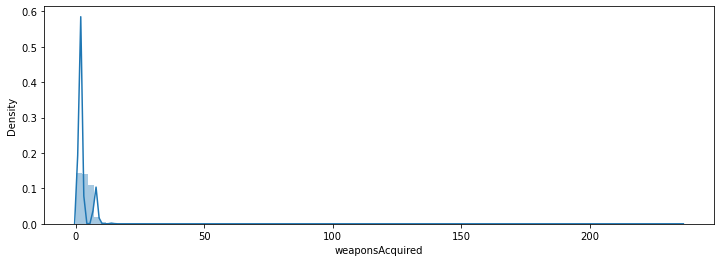

In [48]:
# Plot the distribution of weaponsAcquired
plt.figure(figsize=(12,4))
sns.distplot(pubg['weaponsAcquired'], bins=100)
plt.show()

In [49]:
# Remove outliers
pubg.drop(pubg[pubg['weaponsAcquired'] >= 80].index, inplace=True)

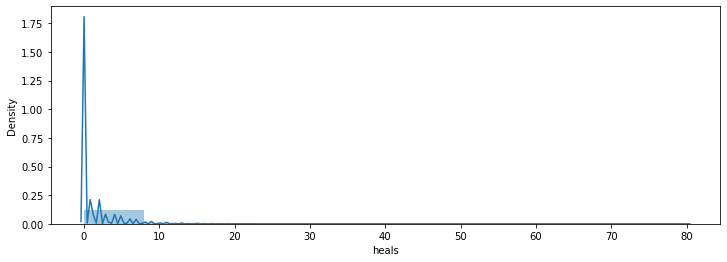

In [50]:
# Distribution of heals
plt.figure(figsize=(12,4))
sns.distplot(pubg['heals'], bins=10)
plt.show()

In [51]:
# Remove outliers
pubg.drop(pubg[pubg['heals'] >= 40].index, inplace=True)

### Outlier conclusions

In [52]:
pubg.shape

(4349053, 38)

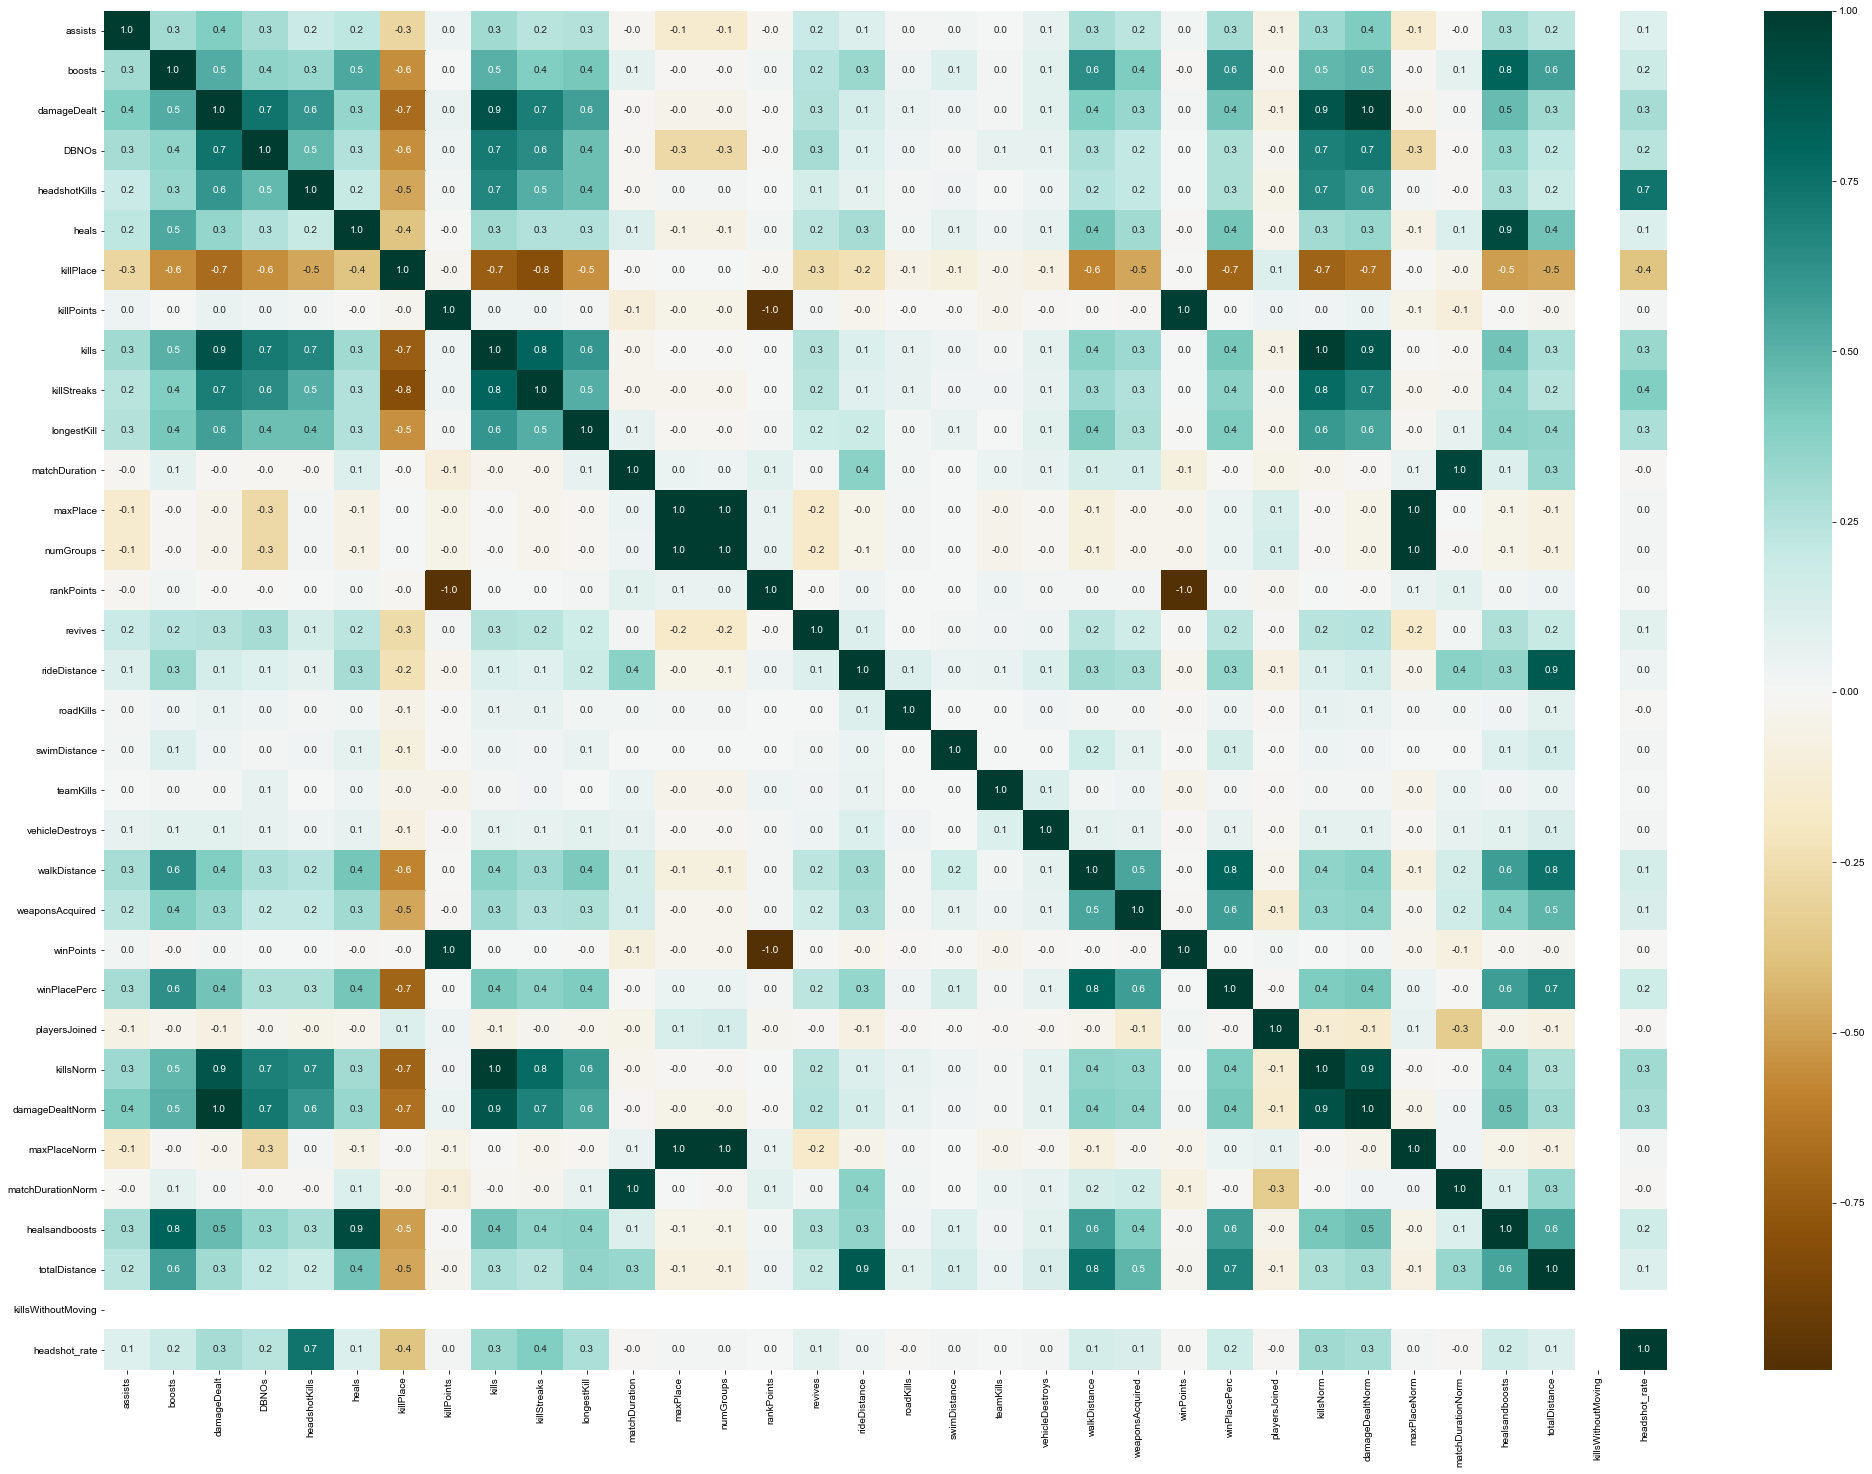

In [53]:
cols_to_fit = [col for col in pubg.columns]
corr = pubg[cols_to_fit].corr()
f,ax = plt.subplots(figsize=(35, 25))
sns.heatmap(pubg[cols_to_fit].corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [54]:
# Removing features having 0 correlation with winPlacePerc
pubg.drop(['killPoints','matchDuration','maxPlace','numGroups','rankPoints','roadKills','teamKills','winPoints',
                   'playersJoined', 'maxPlaceNorm', 'matchDurationNorm', 'killsWithoutMoving'], axis=1, inplace=True)

In [55]:
len(pubg.columns)

26

In [56]:
#Removing features having high correlation
corr_matrix = pubg.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [57]:
to_drop

['kills', 'killsNorm', 'damageDealtNorm', 'healsandboosts', 'totalDistance']

In [58]:
# Drop features 
pubg.drop(pubg[to_drop], axis=1,inplace=True)

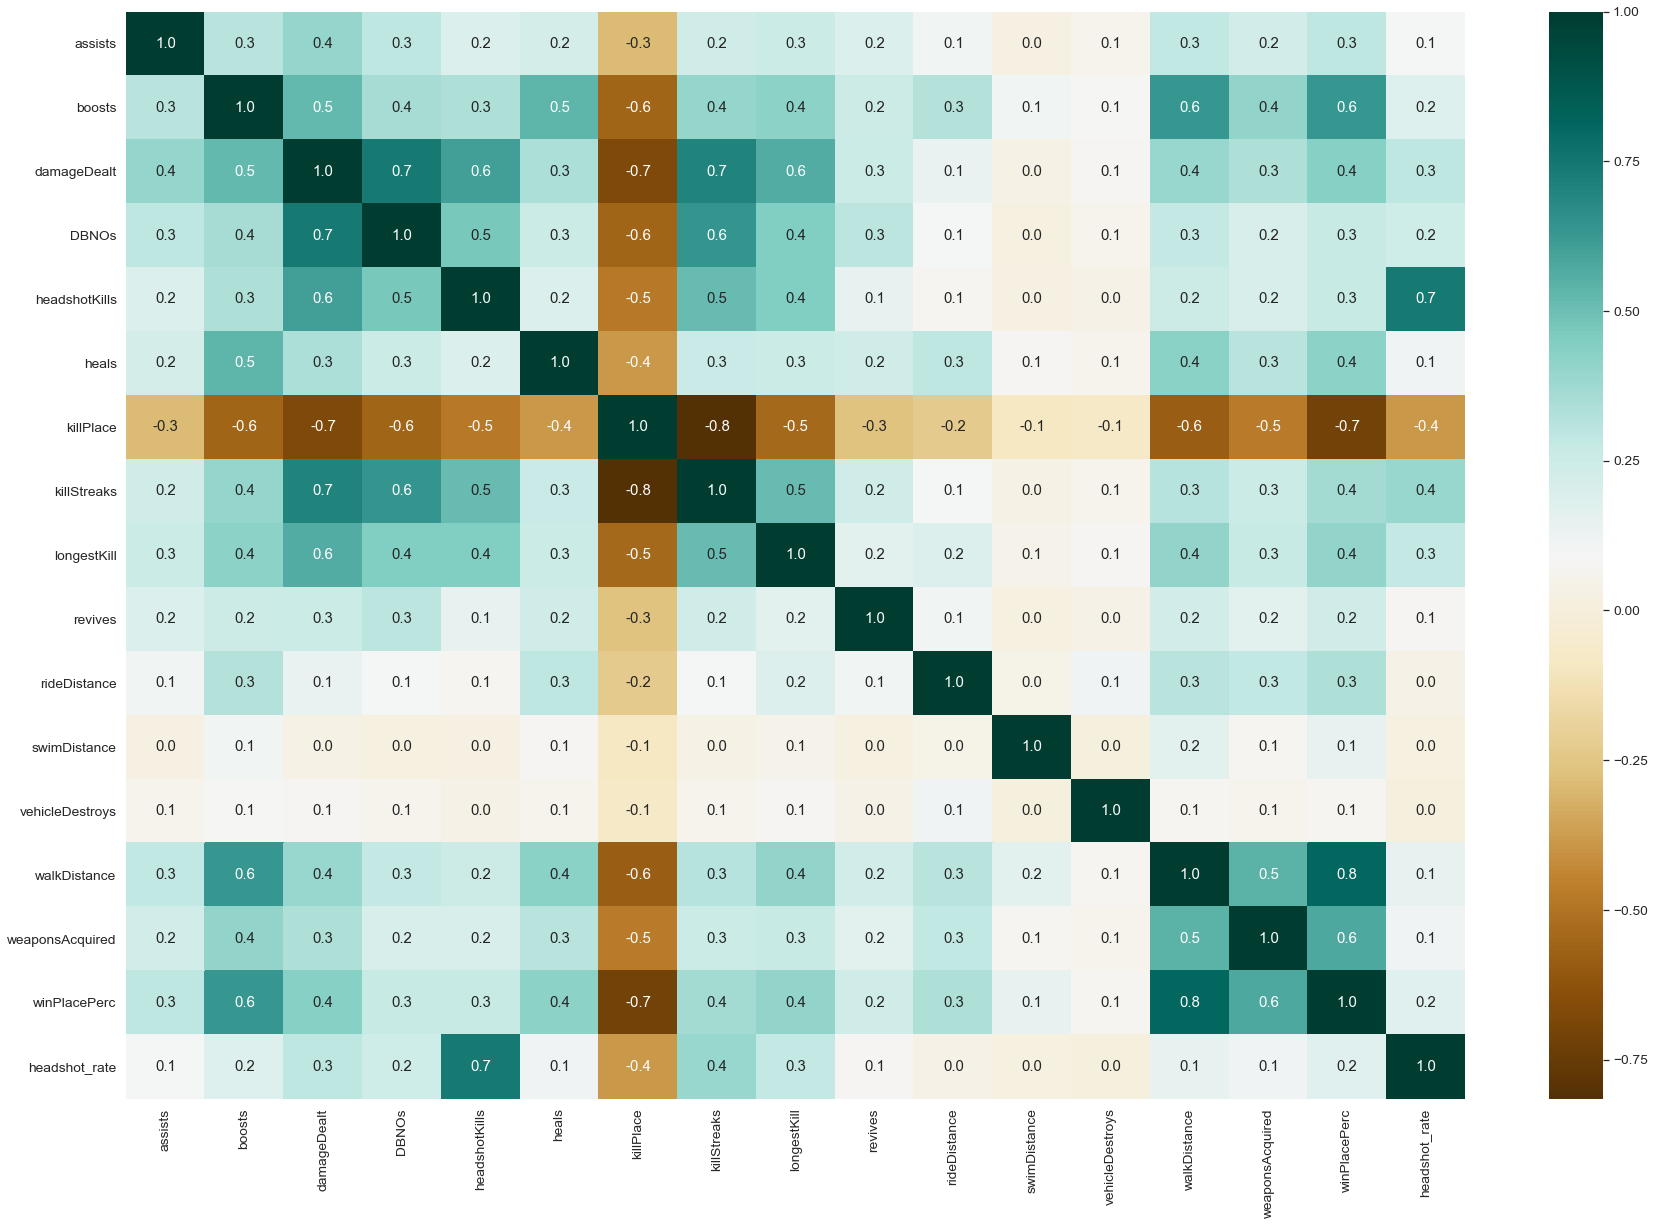

In [59]:
cols_to_fit = [col for col in pubg.columns]
corr = pubg[cols_to_fit].corr()
f,ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr, annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [60]:
# One hot encode matchType
pubg = pd.get_dummies(pubg , columns=['matchType'])

# Take a look at the encoding
matchType_encoding = pubg .filter(regex='matchType')
matchType_encoding.head()

,matchType_duo,matchType_others,matchType_solo,matchType_squad
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,0,1
4,0,0,1,0


In [61]:
# Turn groupId and match Id into categorical types
pubg['groupId'] = pubg ['groupId'].astype('category')
pubg['matchId'] = pubg ['matchId'].astype('category')

# Get category coding for groupId and matchID
pubg['groupId_cat'] = pubg ['groupId'].cat.codes
pubg['matchId_cat'] = pubg ['matchId'].cat.codes

# Get rid of old columns
pubg.drop(columns=['groupId', 'matchId','swimDistance','vehicleDestroys'], inplace=True)

# Lets take a look at our newly created features
pubg[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,609197,29996
1,821640,32654
2,837205,3131
3,1330471,45132
4,1744743,20468


In [62]:
# Drop Id column, because it probably won't be useful for our Machine Learning algorithm,
# because the test set contains different Id's
pubg.drop(columns = ['Id'], inplace=True)


In [63]:
# Take sample for debugging and exploration
sample = 500000
df_sample = pubg.sample(sample)

In [64]:
print(df_sample.shape)

(500000, 21)


In [65]:
# Split sample into training data and target variable
X = df_sample.drop(columns = ['winPlacePerc']) #all columns except target
y = df_sample['winPlacePerc'] # Only target variable

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## LinearRegression

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as metrics


In [68]:
%%time
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_pred = lm.predict(X_test)
r2_score(y_test,lm_pred)

Wall time: 1.13 s


0.8101123420192422

In [69]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,lm_pred )))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, lm_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,lm_pred))))

MAE: 0.09745639334764841
MSE: 0.01747561843741766
RMSE: 0.13219537978846937


## RandomForestRegressor

In [70]:
from sklearn.ensemble import RandomForestRegressor


In [71]:
%%time
model=RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)

Wall time: 4min 13s


0.8893301796636428

In [72]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predict)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predict))))

MAE: 0.07287745747354224
MSE: 0.010185093508982695
RMSE: 0.10092122427409754


## XGBRegressor

In [73]:
import xgboost 


In [74]:

xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [75]:
%%time
xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

Wall time: 3min 51s


0.8905556398744735

In [76]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test,xgb_pred )))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, xgb_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,xgb_pred))))

MAE: 0.07224594056606293
MSE: 0.010072312317788601
RMSE: 0.10036090761423111


In [77]:
from sklearn.svm import SVR #SVC-> Support Vector Regressor

from sklearn.model_selection import GridSearchCV
parameters={'kernel':['rbf'],
            'C':[1,10,50,100],
           'gamma':[0.01,0.1,0.5,1.0]}
grid_model=GridSearchCV(SVR(),parameters,verbose=0)
grid_model.fit(X_train,y_train)

In [ ]:
%%time
model=SVR(C=2,gamma=1,kernel='rbf')# C=0.1 to 1000, gamma=0.01to 10
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)